<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-packages" data-toc-modified-id="Import-packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><strong>Import packages</strong></a></span></li><li><span><a href="#Theoretical-results:-magnetic-field-along-central-axis" data-toc-modified-id="Theoretical-results:-magnetic-field-along-central-axis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><strong>Theoretical results: magnetic field along central axis</strong></a></span></li><li><span><a href="#Coil-arrangements:-results-using-the-n-wire-approach" data-toc-modified-id="Coil-arrangements:-results-using-the-n-wire-approach-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><strong>Coil arrangements: results using the n-wire approach</strong></a></span><ul class="toc-item"><li><span><a href="#A-current-carrying-loop" data-toc-modified-id="A-current-carrying-loop-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span><strong>A current-carrying loop</strong></a></span></li><li><span><a href="#Helmholtz-coils" data-toc-modified-id="Helmholtz-coils-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span><strong>Helmholtz coils</strong></a></span></li><li><span><a href="#Maxwell-coils" data-toc-modified-id="Maxwell-coils-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span><strong>Maxwell coils</strong></a></span></li></ul></li></ul></div>

# **Import packages**

In [1]:
%matplotlib inline
%pylab inline
import numpy as np
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
np.seterr(divide='ignore', invalid='ignore');

Populating the interactive namespace from numpy and matplotlib


# **Theoretical results: magnetic field along central axis**

In [2]:
# function to compute the magnetic field due to a single current-carrying loop (along the main axis)
def Bcoil(z,R,I,N):
    mu0 = 4*np.pi*1e-7
    cte = mu0*N*I*R**2/2.
    Bfield = cte*(R**2+z**2)**(-3./2.)
    return Bfield


# function to compute the magnetic field due to Helmholtz coils (along the main axis)
def BHelmholtz(z,R,I,N):
    Bfield = Bcoil(z+R/2,R,I,N)+Bcoil(z-R/2,R,I,N)
    return Bfield


# function to compute the magnetic field due to Maxwell coils (along the main axis)
def BMaxwell(z,R,I,N):
    Bfield = Bcoil(z,R,I,N) + (49/64.)*Bcoil(z+np.sqrt(3/7.)*R,np.sqrt(4/7.)*R,I,N) + (49/64.)*Bcoil(z-np.sqrt(3/7.)*R,np.sqrt(4/7.)*R,I,N)    
    return Bfield

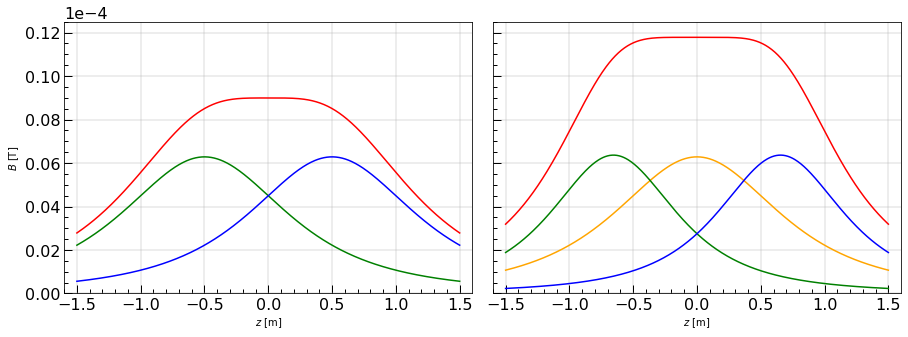

In [3]:
z=np.linspace(-1.5,1.5,500)
R=1
I=1
N=10

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=True)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=None)
ax1.minorticks_on()
ax1.plot(z, Bcoil(z+R/2,R,I,N),'g')
ax1.plot(z, Bcoil(z-R/2,R,I,N),'b')
ax1.plot(z, BHelmholtz(z,R,I,N),'r')
ax1.set_xlim(-1.6, 1.6)
ax1.set_ylim(0,0.125e-4)
ax1.set_xlabel(r"$z$ [m]")
ax1.set_ylabel(r"$B$ [T]")
ax1.grid(linewidth=0.45)
ax1.tick_params(axis='both', which='major', direction='in', length=8, width=1, labelsize=16)
ax1.tick_params(axis='both', which='minor', direction='in', length=4, width=1, labelsize=16)
ax1.yaxis.offsetText.set_fontsize(16)
ax1.ticklabel_format(axis='y', style='sci', scilimits=(-4,-4))              

ax2.minorticks_on()
ax2.plot(z, Bcoil(z,R,I,N),'orange')
ax2.plot(z, (49/64.)*Bcoil(z+np.sqrt(3/7.)*R,np.sqrt(4/7.)*R,I,N),'g')
ax2.plot(z, (49/64.)*Bcoil(z-np.sqrt(3/7.)*R,np.sqrt(4/7.)*R,I,N),'b')
ax2.plot(z, BMaxwell(z,R,I,N),'r')
ax2.set_xlim(-1.6, 1.6)
ax2.set_ylim(0,0.125e-4)
ax2.set_xlabel(r"$z$ [m]")
ax2.grid(linewidth=0.45)
ax2.tick_params(axis='both', which='major', direction='in', length=8, width=1, labelsize=16)
ax2.tick_params(axis='both', which='minor', direction='in', length=4, width=1, labelsize=16)
ax2.yaxis.offsetText.set_fontsize(16)
ax2.ticklabel_format(axis='y', style='sci', scilimits=(-4,-4))              

plt.show()

# **Coil arrangements: results using the n-wire approach**

In [4]:
# function to approximate circles as n-side polygons
def polygon(sides, radius=1, rotation=0, translation=None): 
    one_segment = 2*math.pi/sides
    points = [(math.sin(i*one_segment + rotation)*radius, 0, math.cos(i*one_segment + rotation)*radius) for i in range(sides)]
    if translation:
        points = [[sum(pair) for pair in zip(point, translation)] for point in points]
    return points


# function to compute magnetic field of a finite wire at point (x,y,z)
def pointB(x,y,z,wire, I = 10):
    mu0 = 4*np.pi*1e-7
    c   = mu0*I/(4*np.pi)
    xA, yA, zA = wire[0][0], wire[0][1], wire[0][2]
    xB, yB, zB = wire[1][0], wire[1][1], wire[1][2]
    r1    =  np.sqrt((x-xA)**2+(y-yA)**2+(z-zA)**2) 
    r2    =  np.sqrt((x-xB)**2+(y-yB)**2+(z-zB)**2) 
    L     =  np.sqrt((xB-xA)**2+(yB-yA)**2+(zB-zA)**2) 
    CosTheta1 = (r2**2 - r1**2 - L**2)/(2*L*r1) 
    CosTheta2 = (r2**2 - r1**2 + L**2)/(2*L*r2)
    distance  = np.sqrt(2*r1**2*r2**2+2*r1**2*L**2+2*r2**2*L**2-r1**4-r2**4-L**4)/(2*L)
    Bfield    = c*(CosTheta2 - CosTheta1)/distance
    return Bfield


# function to compute magnetic field of a finite wire in a grid of points (X,Y,Z)
def Bvector(x,y,z,wire, I = 10):
    xA, yA, zA = wire[0][0], wire[0][1], wire[0][2]
    xB, yB, zB = wire[1][0], wire[1][1], wire[1][2]    
    Bfield = pointB(x,y,z,wire, I)
    vx = (yB-yA)*(z-zA)  - (y-yA)*(zB-zA)
    vy = (x-xA) *(zB-zA) - (xB-xA)*(z-zA)
    vz = (xB-xA)*(y-yA)  - (x-xA)*(yB-yA)
    v  = np.sqrt(vx**2+vy**2+vz**2)
    Bx = Bfield*vx/v
    By = Bfield*vy/v
    Bz = Bfield*vz/v
    return Bx,By,Bz

## **A current-carrying loop**

In [5]:
I = 1000  # electric current
N = 50    # define a grid of N^3 points  
x = np.linspace(-1, 2, N)  # spatial points in x 
y = np.linspace(-1, 2, N)  # spatial points in y 
z = np.linspace(-1, 2, N)  # spatial points in z 
x, y, z = np.meshgrid(x, y, z)  # meshgrid
zplane  = round(N/2)  # define z=0 plane

In [6]:
Oo        = [0.5, 0.5, 0.5]  # set origin of the current loop
radius    = 1                # set radius of the current loop  
Nsegments = 100              # number of finite wires to create a polygon  

# create a n-side regular polygon
circle = polygon(Nsegments, radius, 0, Oo)  
circle.append(circle[0])

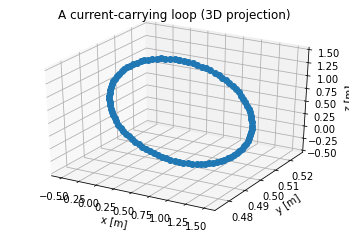

In [7]:
# Plot geometry of the system
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title('A current-carrying loop (3D projection)')
ax.plot(np.array(circle)[:,0],np.array(circle)[:,1],np.array(circle)[:,2],'-o')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z [m]')
plt.show()
fig.clear()

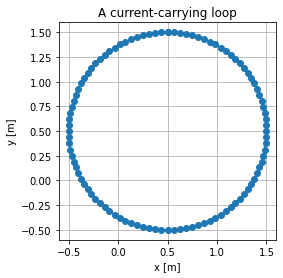

In [8]:
# Plot geometry of the system
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('A current-carrying loop')
ax.set_aspect('equal')
ax.grid()
ax.plot(np.array(circle)[:,0],np.array(circle)[:,2],'-o')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
plt.show()
fig.clear()

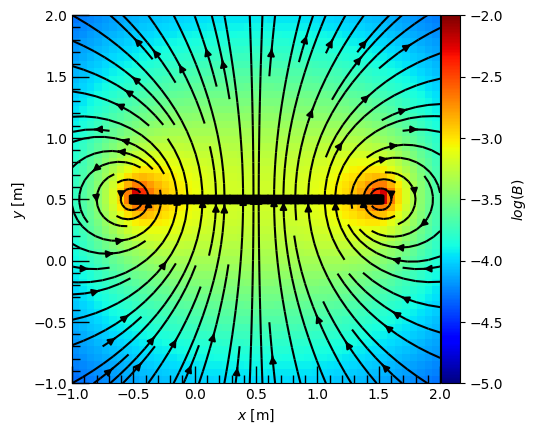

In [9]:
# computing magnetic field for each wire segment of the loop
Bx,By,Bz=0,0,0
counter=0

for i in range(len(circle)-1):
    BX,BY,BZ = Bvector(x,y,z, [circle[counter],circle[counter+1]], I) 
    Bx += BX
    By += BY
    Bz += BZ
    counter+=1

# magnitude of the magnetic field
Bmag = np.sqrt(Bx**2+By**2+Bz**2)

# plotting magnetic field 
fig = plt.figure(figsize=(5,5), dpi=100)
ax = fig.add_subplot(111)
ax.minorticks_on()
ax.set_aspect(aspect=1)
ax.tick_params('both', length=12, width=1, which='major', direction='in')
ax.tick_params('both', length=6, width=1, which='minor', direction='in')

im = ax.pcolormesh(x[:,:,zplane], y[:,:,zplane], np.log10(abs(Bmag[:,:,zplane])), vmin=-5, vmax=-2, cmap='jet')
ax.streamplot(x[:,:,zplane], y[:,:,zplane], Bx[:,:,zplane], By[:,:,zplane],color='k')
ax.plot(np.array(circle)[:,0],np.array(circle)[:,1],'sk')

ax.set_xlabel(r"$x$ [m]")
ax.set_ylabel(r"$y$ [m]")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.01)
cb = fig.colorbar(im, ax=ax, orientation="vertical", cax=cax)
cb.set_label("$log(B)$", labelpad=5)

plt.show()
fig.clear()

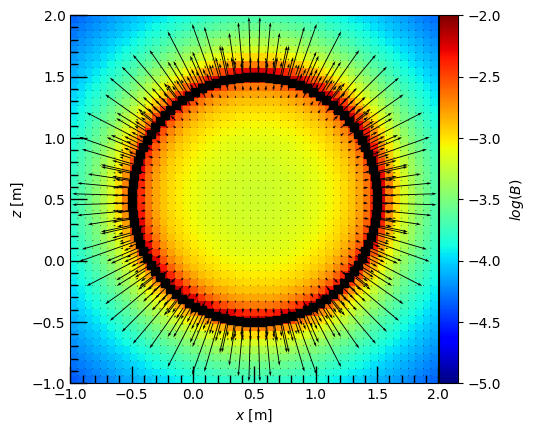

In [10]:
# plotting magnetic field (up view) 
yplane=round(N/2) # plane y=0

fig = plt.figure(figsize=(5,5), dpi=100)
ax = fig.add_subplot(111)
ax.minorticks_on()
ax.set_aspect(aspect=1)
ax.tick_params('both', length=12, width=1, which='major', direction='in')
ax.tick_params('both', length=6, width=1, which='minor', direction='in')

im = ax.pcolormesh(x[yplane,:,:], z[yplane,:,:], np.log10(abs(Bmag[yplane,:,:])), vmin=-5, vmax=-2, cmap='jet') # , vmin=-8, vmax=-2
ax.quiver(x[yplane,:,:], z[yplane,:,:], Bx[yplane,:,:], Bz[yplane,:,:])
ax.plot(np.array(circle)[:,0],np.array(circle)[:,2],'-sk')

ax.set_xlim(-1,2)
ax.set_ylim(-1,2)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.01)
cb = fig.colorbar(im, ax=ax, orientation="vertical", cax=cax)
cb.set_label("$log(B)$", labelpad=5)

ax.set_xlabel(r"$x$ [m]")
ax.set_ylabel(r"$z$ [m]")

plt.show()
fig.clear()

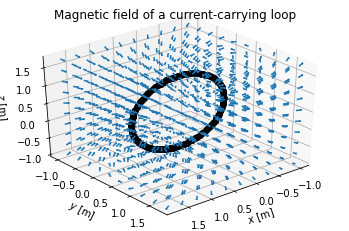

In [11]:
# 3D magnetic field
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title('Magnetic field of a current-carrying loop')

nskip=5 # skip some vector-field for visualization purposes
skip=(slice(None,None,nskip),slice(None,None,nskip),slice(None,None,nskip))
ax.quiver(x[skip], y[skip], z[skip], Bx[skip], By[skip], Bz[skip],cmap='jet',length=.1,normalize=True, clim=(-5,-2))
ax.plot(np.array(circle)[:,0],np.array(circle)[:,1],np.array(circle)[:,2],'-ok')
ax.view_init(elev=35, azim=50)

ax.set_xlabel(r"$x$ [m]")
ax.set_ylabel(r"$y$ [m]")
ax.set_zlabel(r"$z$ [m]")
plt.show()
fig.clear()

## **Helmholtz coils**

In [12]:
# create geometry of the Helmholtz coils
radius    = 1
Nsegments = 100
Oo        = [0.5, 0.0, 0.0] # set origin of a coil

# first coil
circle1=polygon(Nsegments, radius, 0, Oo)
circle1.append(circle1[0])

# second coil
circle2=polygon(Nsegments, radius, 0, [Oo[0],Oo[1]+radius, Oo[2]])
circle2.append(circle2[0])

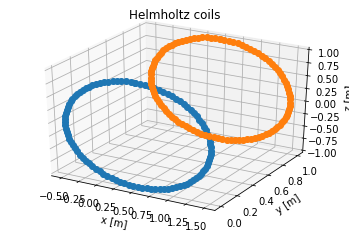

In [13]:
# Plot geometry of the system
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title('Helmholtz coils')

ax.plot(np.array(circle1)[:,0],np.array(circle1)[:,1],np.array(circle1)[:,2],'-o')
ax.plot(np.array(circle2)[:,0],np.array(circle2)[:,1],np.array(circle2)[:,2],'-o')

ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z [m]')
plt.show()
fig.clear()

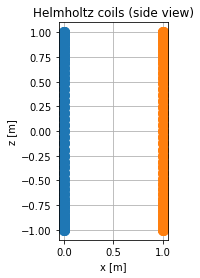

In [14]:
# Plot geometry of the system
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Helmholtz coils (side view)')
ax.set_aspect('equal')
ax.grid()

ax.plot(np.array(circle1)[:,1],np.array(circle1)[:,2],'-o', ms=10)
ax.plot(np.array(circle2)[:,1],np.array(circle2)[:,2],'-o', ms=10)

ax.set_xlabel('x [m]')
ax.set_ylabel('z [m]')
plt.show()
fig.clear()

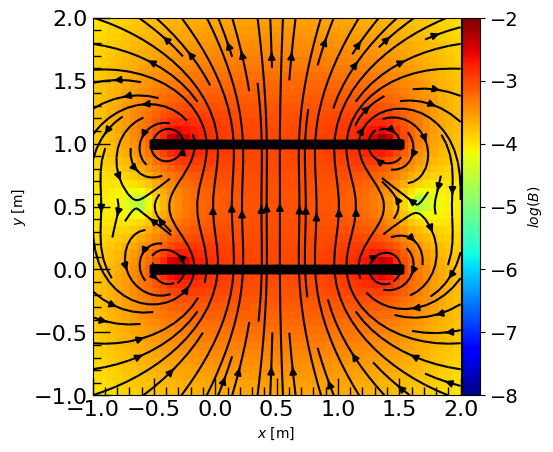

In [15]:
# plot magnetic field distribution in the middle plane
Bx,By,Bz=0,0,0
counter=0

for i in range(len(circle1)-1):
    BX,BY,BZ = Bvector(x,y,z, [circle1[counter],circle1[counter+1]], I) 
    BX2,BY2,BZ2 = Bvector(x,y,z, [circle2[counter],circle2[counter+1]], I) 
    Bx += BX+BX2
    By += BY+BY2
    Bz += BZ+BZ2
    counter+=1

# magnitude of the magnetic field
Bmag = np.sqrt(Bx**2+By**2+Bz**2)

# plotting magnetic field 
fig = plt.figure(figsize=(5,5), dpi=100)
ax = fig.add_subplot(111)
ax.minorticks_on()

ax.tick_params('both', length=12, width=1, which='major', direction='in', labelsize=16)
ax.tick_params('both', length=6, width=1, which='minor', direction='in', labelsize=16)

im = ax.pcolormesh(x[:,:,zplane], y[:,:,zplane], np.log10(abs(Bmag[:,:,zplane])), vmin=-8, vmax=-2, cmap='jet')
ax.streamplot(x[:,:,zplane], y[:,:,zplane], Bx[:,:,zplane], By[:,:,zplane],color='k')
ax.plot(np.array(circle1)[:,0],np.array(circle1)[:,1],'s-',c='k')
ax.plot(np.array(circle2)[:,0],np.array(circle2)[:,1],'s-',c='k')

ax.set_xticks(np.arange(-1,2.5,0.5))
ax.set_yticks(np.arange(-1,2.5,0.5))

ax.set_xlabel(r"$x$ [m]")
ax.set_ylabel(r"$y$ [m]")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.01)
cb = fig.colorbar(im, ax=ax, orientation="vertical", cax=cax)
cb.set_label("$log(B)$", labelpad=5)
cb.ax.tick_params(labelsize=14)

plt.show()
fig.clear()

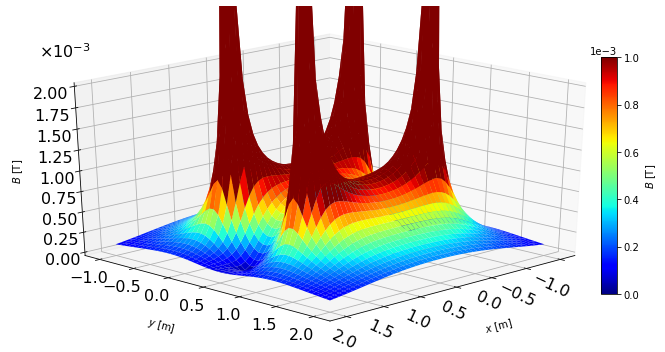

In [16]:
# Intensity of the magnetic field in the plane z=0
fig = plt.figure(figsize=(10,5))
ax = fig.gca(projection='3d')

surf=ax.plot_surface(x[:,:,zplane],y[:,:,zplane],Bmag[:,:,zplane],cmap='jet',edgecolor='none',linewidth=1, antialiased=True, vmin=0, vmax=0.001) #, rstride=1, cstride=1

cb = fig.colorbar(surf, shrink=0.7, aspect=15, pad=-0.05)
cb.set_label("$B$ [T]", labelpad=5)
cb.formatter.set_powerlimits((0, 0))

ax.ticklabel_format(style='sci', axis='z', scilimits=(0,0), useOffset=False)
ax.set_xlabel(r'$x$ [m]', labelpad=20)
ax.set_ylabel(r'$y$ [m]', labelpad=20)
ax.zaxis.set_rotate_label(False) ## rotate the z label.
ax.set_zlabel('$B$ [T]',rotation=90, labelpad=10)

ax.tick_params('both', length=12, width=1, which='major', direction='in', labelsize=16)
ax.tick_params('both', length=6, width=1, which='minor', direction='in', labelsize=16)

for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(-25)

ax.zaxis.offsetText.set_visible(False)
ax.text2D(0.05, 0.85, r'$\times$$10^{-3}$', transform = ax.transAxes, fontsize = 16)

ax.set_zlim(0, 0.002)
ele, azm = 25, 45
ax.view_init(elev=ele, azim=azm)
plt.tight_layout()

plt.show()
fig.clear()

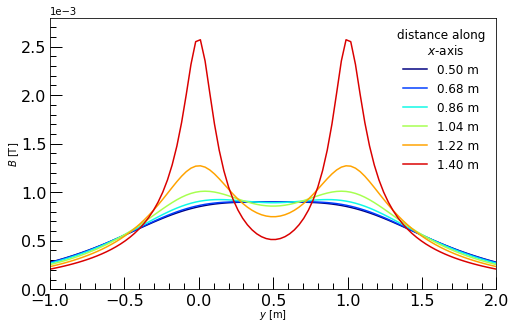

In [17]:
# Projected intensity of the magnetic field in the plane z=0
N = 6 
x = np.linspace(Oo[0], Oo[0]+radius*.9, N)
y = np.linspace(-1, 2, 16*N)
z = np.zeros(N)
x, y, z = np.meshgrid(x, y, z)
zplane=round(N/2)

# compute magnetic field for each wire segment
Bx,By,Bz=0,0,0
counter=0

for i in range(len(circle1)-1):
    BX1,BY1,BZ1 = Bvector(x,y,z, [circle1[counter],circle1[counter+1]], I) 
    BX2,BY2,BZ2 = Bvector(x,y,z, [circle2[counter],circle2[counter+1]], I) 
    Bx += BX1+BX2
    By += BY1+BY2
    Bz += BZ1+BZ2
    counter+=1

# magnitude of the magnetic field
Bmag  = np.sqrt(Bx**2+By**2+Bz**2)

# plot projected intensity of the magnetic field in the plane z=0
fig = plt.figure(figsize=(8,5))
ax = fig.gca()
ax.minorticks_on()
ax.tick_params('both', length=12, width=1, which='major', direction='in', labelsize=16)
ax.tick_params('both', length=6, width=1, which='minor', direction='in', labelsize=16)

n = len(x[0,:,0])
colors = plt.cm.jet(np.linspace(0.,.92,n))

for i in range(n):
    ax.plot(y[:,i,zplane], Bmag[:,i,zplane],'-', label="{0:.2f}".format(x[0,:,0][i])+' m', color=colors[i])

ax.set_xlim(-1., 2.)
ax.set_ylim(0.0, 0.0028)
ax.set_xlabel(r'$y$ [m]', labelpad=0)
ax.set_ylabel('$B$ [T]', labelpad=0)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

ax.legend(loc="upper right", ncol=1, shadow=False, title="distance along\n \t$x$-axis", fancybox=False, frameon=False, fontsize=12)
ax.get_legend().get_title().set_color("k")
ax.get_legend().get_title().set_fontsize(12)

plt.show()
fig.clear()

## **Maxwell coils**

In [18]:
#define a meshgrid
N = 50
x = np.linspace(-1, 2, N)
y = np.linspace(-1, 2, N)
z = np.linspace(-1, 2, N)
x, y, z = np.meshgrid(x, y, z)

In [19]:
# define geometry of the Maxwell coils
radius = 1
Oo     = [0.5, 0.0, 0.0] # set origin of a coil

# create coil arragement using n-side regular polygons
# first coil
circle1=polygon(80, np.sqrt(4/7.)*radius, 0, [Oo[0],Oo[1]+radius/2.-np.sqrt(3/7.)*radius, Oo[2]])  
circle1.append(circle1[0])

# second coil
circle2=polygon(80, np.sqrt(4/7.)*radius, 0, [Oo[0],Oo[1]+radius/2.+np.sqrt(3/7.)*radius, Oo[2]])  
circle2.append(circle2[0])

# third coil
circle3=polygon(80, radius, 0, [Oo[0],Oo[1]+radius/2., Oo[2]])
circle3.append(circle3[0])

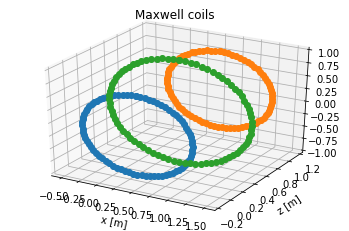

In [20]:
# Plot geometry of the system
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title('Maxwell coils')

ax.plot(np.array(circle1)[:,0],np.array(circle1)[:,1],np.array(circle1)[:,2],'-o')
ax.plot(np.array(circle2)[:,0],np.array(circle2)[:,1],np.array(circle2)[:,2],'-o')
ax.plot(np.array(circle3)[:,0],np.array(circle3)[:,1],np.array(circle3)[:,2],'-o')

ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_ylabel('z [m]')
plt.show()
fig.clear()

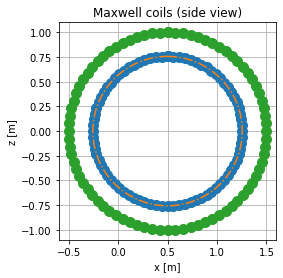

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Maxwell coils (side view)')

ax.plot(np.array(circle1)[:,0],np.array(circle1)[:,2],'-o', ms=10)
ax.plot(np.array(circle2)[:,0],np.array(circle2)[:,2],'-.', ms=10)
ax.plot(np.array(circle3)[:,0],np.array(circle3)[:,2],'-o', ms=10)
ax.set_aspect('equal')
ax.grid()

ax.set_xlabel('x [m]')
ax.set_ylabel('z [m]')
plt.show()
fig.clear()

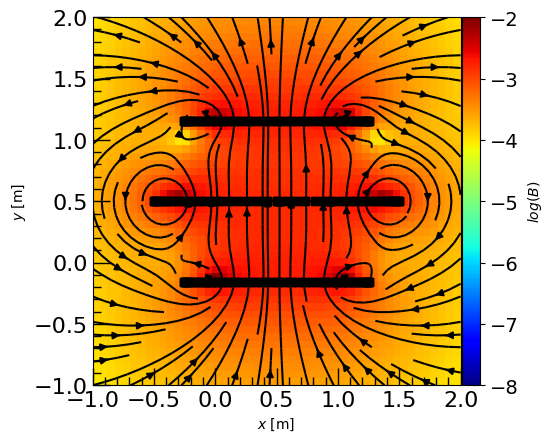

In [22]:
# plot magnetic field distribution in the middle plane
zplane=round(N/2)

Bx,By,Bz=0,0,0
counter=0
for i in range(len(circle1)-1):
    BX,BY,BZ = Bvector(x,y,z, [circle1[counter],circle1[counter+1]], I) 
    BX2,BY2,BZ2 = Bvector(x,y,z, [circle2[counter],circle2[counter+1]], I) 
    BX3,BY3,BZ3 = Bvector(x,y,z, [circle3[counter],circle3[counter+1]], I)      
    Bx += BX+BX2+BX3
    By += BY+BY2+BY3
    Bz += BZ+BZ2+BY3
    counter+=1

Bmag = np.sqrt(Bx**2+By**2+Bz**2)

# plot field
fig = plt.figure(figsize=(5,5), dpi=100)
ax = fig.add_subplot(111)
ax.minorticks_on()
ax.set_aspect(aspect=1)
ax.tick_params('both', length=12, width=1, which='major', direction='in', labelsize=16)
ax.tick_params('both', length=6, width=1, which='minor', direction='in', labelsize=16)

im = ax.pcolormesh(x[:,:,zplane], y[:,:,zplane], np.log10(abs(Bmag[:,:,zplane])), vmin=-8, vmax=-2, cmap='jet')
ax.streamplot(x[:,:,zplane], y[:,:,zplane], Bx[:,:,zplane], By[:,:,zplane],color='k')
ax.plot(np.array(circle1)[:,0],np.array(circle1)[:,1],'s-',c='k')
ax.plot(np.array(circle2)[:,0],np.array(circle2)[:,1],'s-',c='k')
ax.plot(np.array(circle3)[:,0],np.array(circle3)[:,1],'s-',c='k')

ax.set_xlim(-1,2)
ax.set_ylim(-1,2)
ax.set_xticks(np.arange(-1,2.5,0.5))
ax.set_yticks(np.arange(-1,2.5,0.5))

ax.set_xlabel(r"$x$ [m]")
ax.set_ylabel(r"$y$ [m]")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.01)
cb = fig.colorbar(im, ax=ax, orientation="vertical", cax=cax)
cb.set_label("$log(B)$", labelpad=5)
cb.ax.tick_params(labelsize=14)

plt.show()
fig.clear()

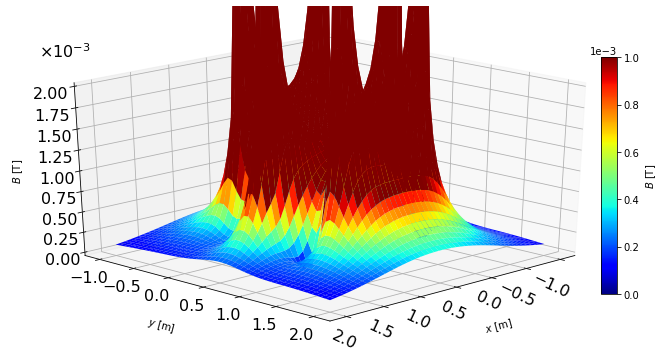

In [23]:
# Intensity of the magnetic field in the plane z=0
fig = plt.figure(figsize=(10,5))
ax = fig.gca(projection='3d')

surf=ax.plot_surface(x[:,:,zplane],y[:,:,zplane],Bmag[:,:,zplane],cmap='jet',edgecolor='none',linewidth=1, antialiased=True, vmin=0, vmax=0.001) #, rstride=1, cstride=1

cb = fig.colorbar(surf, shrink=0.7, aspect=15, pad=-0.05)
cb.set_label("$B$ [T]", labelpad=5)
cb.formatter.set_powerlimits((0, 0))

ax.ticklabel_format(style='sci', axis='z', scilimits=(0,0), useOffset=False)
ax.set_xlabel(r'$x$ [m]', labelpad=20)
ax.set_ylabel(r'$y$ [m]', labelpad=20)
ax.zaxis.set_rotate_label(False) 
ax.set_zlabel('$B$ [T]',rotation=90, labelpad=10)

ax.tick_params('both', length=12, width=1, which='major', direction='in', labelsize=16)
ax.tick_params('both', length=6, width=1, which='minor', direction='in', labelsize=16)

for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(-25)

ax.zaxis.offsetText.set_visible(False)
ax.text2D(0.05, 0.85, r'$\times$$10^{-3}$', transform = ax.transAxes, fontsize = 16)

ax.set_zlim(0, 0.002)
ele, azm = 25, 45
ax.view_init(elev=ele, azim=azm) 
plt.tight_layout()

plt.show()
fig.clear()

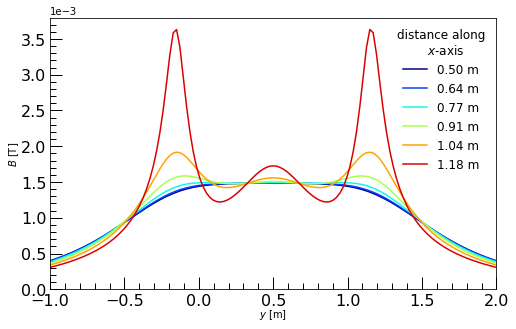

In [24]:
# Projected intensity of the magnetic field in the plane z=0
N = 15 
x = np.linspace(Oo[0], Oo[0]+np.sqrt(4/7)*radius*.9, 6) 
y = np.linspace(-1, 2, 9*N)
z = np.zeros(N)
x, y, z = np.meshgrid(x, y, z)
zplane=round(N/2)

# compute magnetic field 
Bx,By,Bz=0,0,0
counter=0

for i in range(len(circle1)-1):
    BX,BY,BZ = Bvector(x,y,z, [circle1[counter],circle1[counter+1]], I) 
    BX2,BY2,BZ2 = Bvector(x,y,z, [circle2[counter],circle2[counter+1]], I) 
    BX3,BY3,BZ3 = Bvector(x,y,z, [circle3[counter],circle3[counter+1]], I)      
    Bx += BX+BX2+BX3
    By += BY+BY2+BY3
    Bz += BZ+BZ2+BY3
    counter+=1

Bmag  = np.sqrt(Bx**2+By**2+Bz**2)

# plot projected intensity of the magnetic field in the plane z=0
fig = plt.figure(figsize=(8,5))
ax = fig.gca()
ax.minorticks_on()
ax.tick_params('both', length=12, width=1, which='major', direction='in', labelsize=16)
ax.tick_params('both', length=6, width=1, which='minor', direction='in', labelsize=16)

n = len(x[0,:,0])
colors = plt.cm.jet(np.linspace(0.,.92,n))

for i in range(n):
    ax.plot(y[:,i,zplane], Bmag[:,i,zplane],'-', label="{0:.2f}".format(x[0,:,0][i])+' m', color=colors[i])

ax.set_xlim(-1., 2.)
ax.set_ylim(0.0, 0.0038)
ax.set_xlabel(r'$y$ [m]', labelpad=0)
ax.set_ylabel('$B$ [T]', labelpad=0)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

ax.legend(loc="upper right", ncol=1, shadow=False, title="distance along\n \t$x$-axis", fancybox=False, frameon=False, fontsize=12)
ax.get_legend().get_title().set_color("k")
ax.get_legend().get_title().set_fontsize(12)

plt.show()
fig.clear()